<a href="https://colab.research.google.com/github/sofiagracereina/-sofia_INFO5731_Fall2024-/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

The distribution for both region and type is relavtively consistent. every region produces 338 bags expect WestTexNewMexico which made 340. type is also consistent with 9126 conventional bags and 9127 orgnaic bags. the only variable that has significant difference is year. 2017 = 5722, 2016 = 5616, 2015 = 5615,2018 = 1300, 1904 = 1. 1904 seems to be an outlier that should be removed. other then that there seems a consistent upward trend in bag sales until 2018.

Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv
   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Alban

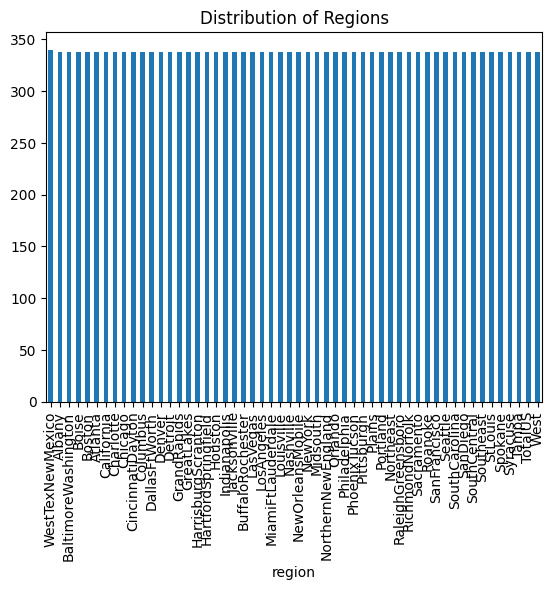

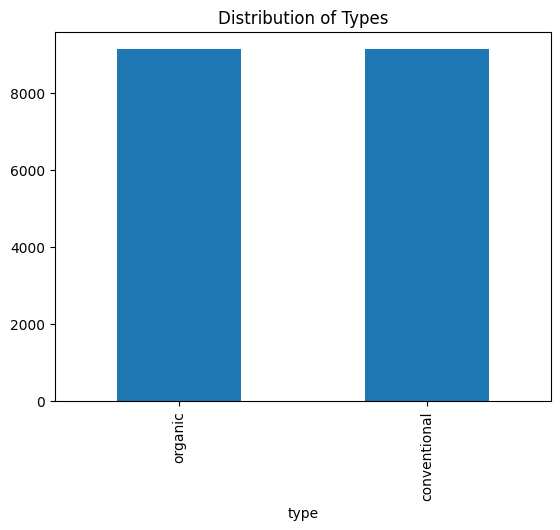

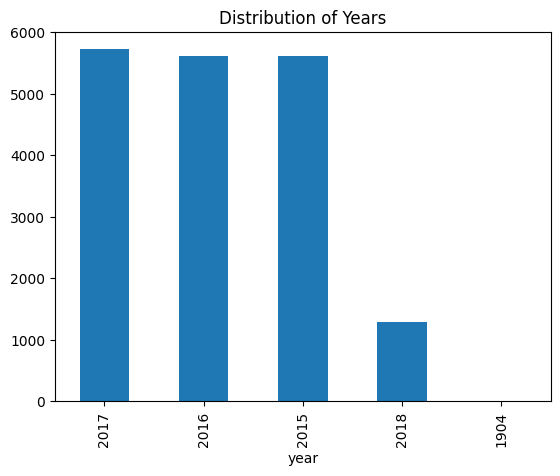

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')

print(df.head())
print(df.info())
print(df['region'].value_counts())
if 'type' in df.columns:
    print(df['type'].value_counts())
if 'year' in df.columns:
    print(df['year'].value_counts())

df['region'].value_counts().plot(kind='bar', title='Distribution of Regions')
plt.show()

if 'type' in df.columns:
    df['type'].value_counts().plot(kind='bar', title='Distribution of Types')
    plt.show() # Added plt.show() for the type plot
if 'year' in df.columns:
    df['year'].value_counts().plot(kind='bar', title='Distribution of Years')
    plt.show() # Added plt.show() for the year plot

Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

Since there are so few duplicate rows id like drop them, and the missing values id replace with the mean value.

In [5]:
# Check for duplicate rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("\nDuplicate rows (first 5):")
    display(df[df.duplicated()].head())

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv
Number of duplicate rows: 2

Duplicate rows (first 5):


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18249,10,1-14-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18253,7,2-4-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico



Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

there are 10 times as many rows as there are columns so i would deem it sufficent for training.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')
# Print the number of rows and columns
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Saving Assignment 2 dataset.csv to Assignment 2 dataset (1).csv
Number of rows: 18254
Number of columns: 14


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')
# Remove 'Column 1' if it exists
if 'Column 1' in df.columns:
    df = df.drop(columns=['Column 1'])
    print("Removed 'Column 1' from the dataset.")
else:
    print("'Column 1' not found in the dataset.")

# Treat 'year' variable as nominal (categorical)
df['year'] = df['year'].astype('category')
print("Converted 'year' column to categorical type.")

print("\nDataFrame info after changes:")
df.info()

Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv
Removed 'Column 1' from the dataset.
Converted 'year' column to categorical type.

DataFrame info after changes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          18254 non-null  object  
 1   AveragePrice  18254 non-null  float64 
 2   Total Volume  18253 non-null  float64 
 3   4046          18252 non-null  float64 
 4   4225          18253 non-null  float64 
 5   4770          18253 non-null  float64 
 6   Total Bags    18253 non-null  float64 
 7   Small Bags    18252 non-null  float64 
 8   Large Bags    18252 non-null  float64 
 9   XLarge Bags   18253 non-null  float64 
 10  type          18253 non-null  object  
 11  year          18254 non-null  category
 12  region        18254 non-null  object  
dtypes: category(1), float64(9), object(3)
memory usag

2.2 Check for duplicate values and remove them.

In [8]:
# Write your code here
# Check for duplicate rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')
duplicate_values = df.duplicated().sum()
print(f"Number of duplicate values: {duplicate_values}")

if duplicate_rows > 0:
    print("\nDuplicate values (first 5):")
    display(df[df.duplicated()].head())

Saving Assignment 2 dataset.csv to Assignment 2 dataset (3).csv
Number of duplicate values: 2

Duplicate values (first 5):


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18249,10,1-14-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18253,7,2-4-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [9]:
import pandas as pd
import numpy as np

# --- Ensure df is in the correct state as per previous steps ---
# Reload the dataset to ensure a clean state for this operation,
# as kernel state might not always reflect the latest changes from previous cells.
df = pd.read_csv('Assignment 2 dataset.csv')

# Remove 'Column 1' if it exists (as per cell 2.1)
if 'Column 1' in df.columns:
    df = df.drop(columns=['Column 1'])
    print("Removed 'Column 1' from the dataset for this operation.")
else:
    print("'Column 1' not found in the dataset. Skipping removal.")

# Treat 'year' variable as nominal (categorical) (as per cell 2.1)
df['year'] = df['year'].astype('category')
print("Converted 'year' column to categorical type for this operation.")

# --- Initial check for missing values and shape ---
print("\n--- Initial missing values before cleaning ---")
initial_missing_values = df.isnull().sum()
print(initial_missing_values[initial_missing_values > 0])
initial_rows, initial_cols = df.shape
print(f"Initial DataFrame shape: {initial_rows} rows, {initial_cols} columns.")

# 1. Remove rows with most missing values
# Calculate the number of non-null values per row
df['non_null_count'] = df.count(axis=1)

# Calculate the threshold for removal (rows with missing values in >= half of its columns)
# This means a row must have at least 'threshold_non_null' non-null values to be kept.
threshold_non_null = np.ceil(initial_cols / 2) # Use ceil to round up if it's X.5
print(f"\nThreshold for row removal: A row must have at least {int(threshold_non_null)} non-null columns to be kept.")

# Filter out rows that have fewer non-null values than the threshold
df_cleaned_rows = df[df['non_null_count'] >= threshold_non_null].copy()
rows_removed = initial_rows - df_cleaned_rows.shape[0]

# Drop the auxiliary 'non_null_count' column
df_cleaned_rows = df_cleaned_rows.drop(columns=['non_null_count'])

df = df_cleaned_rows # Update the main DataFrame
print(f"Removed {rows_removed} rows where more than half of the columns had missing values.")
print(f"DataFrame shape after row removal: {df.shape[0]} rows, {df.shape[1]} columns.")

# 2. Impute few missing values with regional median
# Identify numerical columns that still have missing values
numeric_cols_with_nan = [col for col in df.select_dtypes(include=np.number).columns if df[col].isnull().any()]

print(f"\nNumerical columns identified for regional median imputation: {numeric_cols_with_nan}")

for col in numeric_cols_with_nan:
    # Impute missing values with the median of that column within its specific 'Region'
    df[col] = df.groupby('region')[col].transform(lambda x: x.fillna(x.median()))
    print(f"Imputed missing values in '{col}' using regional medians.")

# 3. Verify missing values after cleaning
print("\n--- Missing values after all cleaning steps ---")
final_missing_values = df.isnull().sum()
# Print only columns that still have missing values, if any
if final_missing_values[final_missing_values > 0].empty:
    print("No missing values remaining in the dataset.")
else:
    print(final_missing_values[final_missing_values > 0])

print(f"Final DataFrame shape: {df.shape[0]} rows, {df.shape[1]} columns.")

# 4. Summary of the data cleaning process
print("\n--- Summary of Missing Value Handling ---")
print(f"Initially, the dataset had {initial_rows} rows and {initial_cols} columns.")
print(f"Removed {rows_removed} rows that had missing values in more than half of their columns.")
print(f"For the remaining rows, missing values in numerical columns ({', '.join(numeric_cols_with_nan) if numeric_cols_with_nan else 'None'}) were imputed using the median of that column within its specific 'Region'.")
if not final_missing_values[final_missing_values > 0].empty:
    print(f"After all cleaning steps, the following columns still contain missing values:\n{final_missing_values[final_missing_values > 0]}")
else:
    print("All missing values in numerical columns have been successfully imputed.")
print(f"The final dataset has {df.shape[0]} rows and {df.shape[1]} columns.")






Removed 'Column 1' from the dataset for this operation.
Converted 'year' column to categorical type for this operation.

--- Initial missing values before cleaning ---
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
dtype: int64
Initial DataFrame shape: 18254 rows, 13 columns.

Threshold for row removal: A row must have at least 7 non-null columns to be kept.
Removed 1 rows where more than half of the columns had missing values.
DataFrame shape after row removal: 18253 rows, 13 columns.

Numerical columns identified for regional median imputation: ['4046', 'Small Bags', 'Large Bags']
Imputed missing values in '4046' using regional medians.
Imputed missing values in 'Small Bags' using regional medians.
Imputed missing values in 'Large Bags' using regional medians.

--- Missing values after all cleaning steps ---
No missing values remaining in the dataset.
Final DataFrame sha

2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


correlation between independent variables can complicate the accuracy of models because it can obscure the actual correlation you're looking for.

Pearson Correlation Matrix:
              AveragePrice  Total Volume  4046  4225  4770  Total Bags  \
AveragePrice          1.00         -0.19 -0.21 -0.17 -0.18       -0.18   
Total Volume         -0.19          1.00  0.98  0.97  0.87        0.96   
4046                 -0.21          0.98  1.00  0.93  0.83        0.92   
4225                 -0.17          0.97  0.93  1.00  0.89        0.91   
4770                 -0.18          0.87  0.83  0.89  1.00        0.79   
Total Bags           -0.18          0.96  0.92  0.91  0.79        1.00   
Small Bags           -0.17          0.97  0.93  0.92  0.80        0.99   
Large Bags           -0.17          0.88  0.84  0.81  0.70        0.94   
XLarge Bags          -0.12          0.75  0.70  0.69  0.68        0.80   

              Small Bags  Large Bags  XLarge Bags  
AveragePrice       -0.17       -0.17        -0.12  
Total Volume        0.97        0.88         0.75  
4046                0.93        0.84         0.70  
4225                0.9

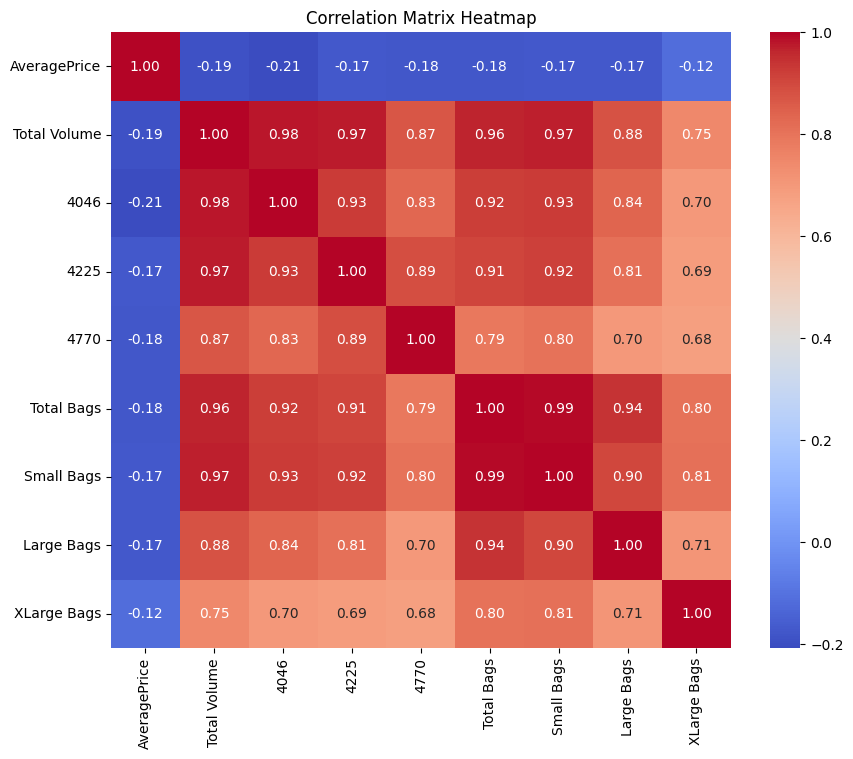

Highly Correlated Variable Pairs (absolute correlation > 0.7):
- Total Volume and 4046: 0.98
- Total Volume and 4225: 0.97
- Total Volume and 4770: 0.87
- Total Volume and Total Bags: 0.96
- Total Volume and Small Bags: 0.97
- Total Volume and Large Bags: 0.88
- Total Volume and XLarge Bags: 0.75
- 4046 and 4225: 0.93
- 4046 and 4770: 0.83
- 4046 and Total Bags: 0.92
- 4046 and Small Bags: 0.93
- 4046 and Large Bags: 0.84
- 4225 and 4770: 0.89
- 4225 and Total Bags: 0.91
- 4225 and Small Bags: 0.92
- 4225 and Large Bags: 0.81
- 4770 and Total Bags: 0.79
- 4770 and Small Bags: 0.80
- Total Bags and Small Bags: 0.99
- Total Bags and Large Bags: 0.94
- Total Bags and XLarge Bags: 0.80
- Small Bags and Large Bags: 0.90
- Small Bags and XLarge Bags: 0.81
- Large Bags and XLarge Bags: 0.71


In [13]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix.round(2))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)): # Avoid self-correlation and duplicate pairs
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, corr_value))

print("Highly Correlated Variable Pairs (absolute correlation > 0.7):")
if highly_correlated_pairs:
    for pair in highly_correlated_pairs:
        print(f"- {pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No highly correlated pairs found (absolute correlation > 0.7).")

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [15]:
import pandas as pd
import numpy as np

description_output = []

# --- Handle Date column ----
# Convert 'Date' to datetime for proper range analysis
# The previous cleaning step (DjCqQrfKaAEx) ensured no missing values,
# but it's good practice to convert to datetime for time-series analysis.
df['Date'] = pd.to_datetime(df['Date'])

# --- Identify Continuous and Categorical Variables ---
# Exclude 'Date' from general categorical processing for specific handling
continuous_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns.tolist() if col != 'Date']

# --- Describe Continuous Variables ---
description_output.append("### Continuous Variables\n")
for col in continuous_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    col_mean = df[col].mean()
    col_median = df[col].median()
    col_std = df[col].std() # For distribution insight

    description_output.append(f"#### {col}")
    description_output.append(f"- **Type**: Continuous (float64)")
    description_output.append(f"- **Range (Min, Max)**: ({col_min:.2f}, {col_max:.2f})")
    description_output.append(f"- **Mean**: {col_mean:.2f}")
    description_output.append(f"- **Median**: {col_median:.2f}")

    # Distribution interpretation based on mean, median, and std (using a common heuristic)
    if col_std == 0: # Handle cases with no variance
        distribution_desc = "Values are constant."
    elif abs(col_mean - col_median) < (0.1 * col_std):
        distribution_desc = "The distribution appears relatively symmetric (mean is close to median)."
    elif col_mean > col_median:
        distribution_desc = "The distribution appears right-skewed (mean > median, tail to the right)."
    else:
        distribution_desc = "The distribution appears left-skewed (mean < median, tail to the left)."
    description_output.append(f"- **Distribution**: {distribution_desc}\n")


# --- Describe Categorical Variables ---
description_output.append("### Categorical Variables\n")

# Handle Date separately
description_output.append(f"#### Date")
min_date = df['Date'].min().strftime('%Y-%m-%d')
max_date = df['Date'].max().strftime('%Y-%m-%d')
description_output.append(f"- **Type**: Date/Time (originally object, converted to datetime)")
description_output.append(f"- **Date Range**: From {min_date} to {max_date}")
description_output.append(f"- **Number of Unique Dates**: {df['Date'].nunique()}\n")

for col in categorical_cols:
    unique_values = df[col].unique().tolist()
    num_unique = len(unique_values)
    description_output.append(f"#### {col}")
    description_output.append(f"- **Type**: {df[col].dtype}")
    description_output.append(f"- **Number of Unique Values**: {num_unique}")

    if num_unique <= 20: # Display all unique values if not too many
        description_output.append(f"- **Unique Values**: {', '.join(map(str, sorted(unique_values)))}")
    else: # Display top 10 most frequent if many unique values (e.g., 'region')
        top_values = df[col].value_counts().head(10).index.tolist()
        description_output.append(f"- **Top 10 Most Frequent Values**: {', '.join(map(str, top_values))}")
    description_output.append("\n")

# Print the final description
print("\n".join(description_output))


### Continuous Variables

#### AveragePrice
- **Type**: Continuous (float64)
- **Range (Min, Max)**: (0.44, 3.25)
- **Mean**: 1.41
- **Median**: 1.37
- **Distribution**: The distribution appears relatively symmetric (mean is close to median).

#### Total Volume
- **Type**: Continuous (float64)
- **Range (Min, Max)**: (84.56, 62505646.52)
- **Mean**: 850460.94
- **Median**: 107306.08
- **Distribution**: The distribution appears right-skewed (mean > median, tail to the right).

#### 4046
- **Type**: Continuous (float64)
- **Range (Min, Max)**: (0.00, 22743616.17)
- **Mean**: 292945.95
- **Median**: 8641.10
- **Distribution**: The distribution appears right-skewed (mean > median, tail to the right).

#### 4225
- **Type**: Continuous (float64)
- **Range (Min, Max)**: (0.00, 20470572.61)
- **Mean**: 295090.46
- **Median**: 29054.71
- **Distribution**: The distribution appears right-skewed (mean > median, tail to the right).

#### 4770
- **Type**: Continuous (float64)
- **Range (Min, Max)**:

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

the earliesdt data point of 1 in 1904 does not seem reasonable. I would deem it an outlier and remove it.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')

# Ensure 'Date' column is in datetime format
# (This step might be redundant if the previous cell was run, but ensures consistency)
df['Date'] = pd.to_datetime(df['Date'])

# Find the earliest Date
earliest_date = df['Date'].min()
print(f"Earliest recorded Date: {earliest_date.strftime('%Y-%m-%d')}")

# Check for avocado prices recorded from the earliest date up to 2010
data_up_to_2010 = df[df['Date'].dt.year <= 2010]

print(f"\nNumber of records from earliest date up to and including 2010: {len(data_up_to_2010)}")
if not data_up_to_2010.empty:
    print("Records found up to 2010 (first 5):")
    print(data_up_to_2010.head())
else:
    print("No records found up to 2010.")

# Comment on the earliest data point
print("\n--- Comment on the earliest data point ---")
if earliest_date.year < 2015:
    print(f"The earliest recorded date is {earliest_date.strftime('%Y-%m-%d')}. This date (1904) appears to be an anomaly given that the vast majority of the data is from 2015-2018.")
    print("There is only one record for the year 1904, which strongly suggests it is a data entry error rather than a genuine historical record of avocado prices.")
    print("\nRecommendation: It is highly advisable to *remove* this data point (and any other records from 1904 or similarly anomalous years) as it can skew statistical analysis and model training. Keeping it could introduce significant bias and negatively impact the accuracy of any time-series analysis or predictive models built on this dataset.")
else:
    print(f"The earliest recorded date {earliest_date.strftime('%Y-%m-%d')} appears reasonable within the context of the dataset.")


Saving Assignment 2 dataset.csv to Assignment 2 dataset (1).csv
Earliest recorded Date: 1904-01-21

Number of records from earliest date up to and including 2010: 1
Records found up to 2010 (first 5):
       Column 1       Date  AveragePrice  Total Volume     4046     4225  \
18250         9 1904-01-21          1.87      13766.76  1191.92  2452.79   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18250  727.94     9394.11      9351.8       42.31          0.0  organic  1904   

                 region  
18250  WestTexNewMexico  

--- Comment on the earliest data point ---
The earliest recorded date is 1904-01-21. This date (1904) appears to be an anomaly given that the vast majority of the data is from 2015-2018.
There is only one record for the year 1904, which strongly suggests it is a data entry error rather than a genuine historical record of avocado prices.

Recommendation: It is highly advisable to *remove* this data point (and any other records 

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

i coded to define the highest average price and then to search the database fir what region it belonged to.

In [4]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')
# Find the highest AveragePrice
highest_avg_price = df['AveragePrice'].max()

# Find the row(s) where AveragePrice is equal to the highest_avg_price
# Use .copy() to avoid SettingWithCopyWarning if further modifications were made
regions_highest_price = df[df['AveragePrice'] == highest_avg_price].copy()

print(f"The highest AveragePrice recorded is: {highest_avg_price:.2f}")

# Report the region(s) it belongs to
if not regions_highest_price.empty:
    print("It belongs to the following region(s) and associated details:")
    # Display unique regions and potentially other relevant columns if there are multiple matches
    display(regions_highest_price[['region', 'Date', 'type', 'AveragePrice']])
else:
    print("No region found for this highest AveragePrice (this should not happen if data exists).")

Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv
The highest AveragePrice recorded is: 3.25
It belongs to the following region(s) and associated details:


,region,Date,type,AveragePrice
14125,SanFrancisco,10-30-2016,organic,3.25


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

coded to define highest total volume, then display the index of the maximum value.

In [5]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file if it's not already in the Colab environment
# This will open a dialog to select the file from your local machine
uploaded = files.upload()

# Assuming 'Assignment 2 dataset.csv' is the file you want to load
df = pd.read_csv('Assignment 2 dataset.csv')

highest_total_volume = df['Total Volume'].max()
print(f"The highest Total Volume recorded is: {highest_total_volume:.2f}")

df.loc[df["Total Volume"].idxmax()]

Saving Assignment 2 dataset.csv to Assignment 2 dataset (3).csv
The highest Total Volume recorded is: 62505646.52


,9097
Column 1,7
Date,2-4-2018
AveragePrice,0.87
Total Volume,62505646.52
4046,21620180.9
4225,20445501.03
4770,1066830.22
Total Bags,19373134.37
Small Bags,13384586.8
Large Bags,5719096.61


# Task
Calculate the Pearson correlation matrix for all numerical variables in the dataset `df`, visualize this matrix using a heatmap, identify and display pairs of variables with an absolute correlation greater than 0.7, and finally, explain the impact of highly correlated variables on machine learning model accuracy and interpretability.

## Calculate Correlation Matrix

### Subtask:
Compute the Pearson correlation matrix for all numerical variables in the dataset.


**Reasoning**:
To compute the Pearson correlation matrix, I first need to select all numerical columns from the DataFrame. Then, I will apply the `.corr()` method to these selected columns.



In [10]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix.round(2))

Pearson Correlation Matrix:
              AveragePrice  Total Volume  4046  4225  4770  Total Bags  \
AveragePrice          1.00         -0.19 -0.21 -0.17 -0.18       -0.18   
Total Volume         -0.19          1.00  0.98  0.97  0.87        0.96   
4046                 -0.21          0.98  1.00  0.93  0.83        0.92   
4225                 -0.17          0.97  0.93  1.00  0.89        0.91   
4770                 -0.18          0.87  0.83  0.89  1.00        0.79   
Total Bags           -0.18          0.96  0.92  0.91  0.79        1.00   
Small Bags           -0.17          0.97  0.93  0.92  0.80        0.99   
Large Bags           -0.17          0.88  0.84  0.81  0.70        0.94   
XLarge Bags          -0.12          0.75  0.70  0.69  0.68        0.80   

              Small Bags  Large Bags  XLarge Bags  
AveragePrice       -0.17       -0.17        -0.12  
Total Volume        0.97        0.88         0.75  
4046                0.93        0.84         0.70  
4225                0.9

## Visualize Correlation Matrix

### Subtask:
Create a heatmap of the correlation matrix to visually identify strong positive and negative correlations.


**Reasoning**:
To visually represent the correlation matrix, I will create a heatmap using seaborn, which allows for easy visualization of correlations between variables.



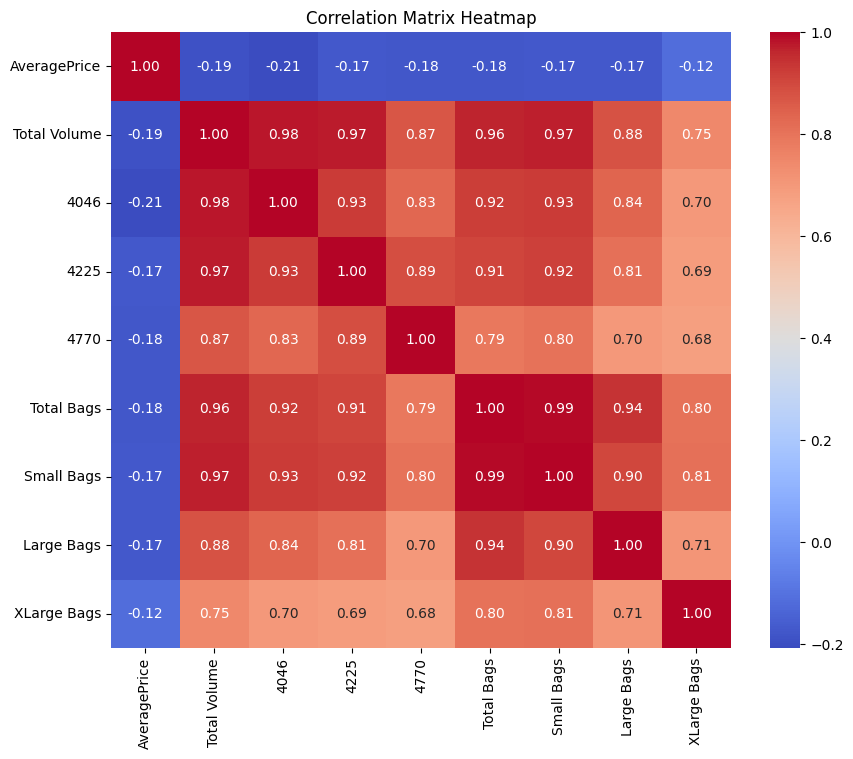

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
To identify highly correlated variables, I will extract pairs of variables from the correlation matrix where the absolute correlation value is greater than 0.7, excluding self-correlations and duplicate pairs.



In [12]:
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)): # Avoid self-correlation and duplicate pairs
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col1, col2, corr_value))

print("Highly Correlated Variable Pairs (absolute correlation > 0.7):")
if highly_correlated_pairs:
    for pair in highly_correlated_pairs:
        print(f"- {pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No highly correlated pairs found (absolute correlation > 0.7).")

Highly Correlated Variable Pairs (absolute correlation > 0.7):
- Total Volume and 4046: 0.98
- Total Volume and 4225: 0.97
- Total Volume and 4770: 0.87
- Total Volume and Total Bags: 0.96
- Total Volume and Small Bags: 0.97
- Total Volume and Large Bags: 0.88
- Total Volume and XLarge Bags: 0.75
- 4046 and 4225: 0.93
- 4046 and 4770: 0.83
- 4046 and Total Bags: 0.92
- 4046 and Small Bags: 0.93
- 4046 and Large Bags: 0.84
- 4225 and 4770: 0.89
- 4225 and Total Bags: 0.91
- 4225 and Small Bags: 0.92
- 4225 and Large Bags: 0.81
- 4770 and Total Bags: 0.79
- 4770 and Small Bags: 0.80
- Total Bags and Small Bags: 0.99
- Total Bags and Large Bags: 0.94
- Total Bags and XLarge Bags: 0.80
- Small Bags and Large Bags: 0.90
- Small Bags and XLarge Bags: 0.81
- Large Bags and XLarge Bags: 0.71


## Impact of Highly Correlated Variables on Machine Learning Models

Highly correlated variables, also known as multicollinearity, can significantly impact machine learning models in several ways:

1.  **Model Accuracy**: While some models (like tree-based models) are less affected by multicollinearity, linear models (e.g., Linear Regression, Logistic Regression) can suffer. Multicollinearity can lead to unstable coefficient estimates, making it difficult to determine the true relationship between predictors and the target variable. This instability can reduce the model's predictive power on unseen data if the correlations in the new data differ.

2.  **Model Interpretability**: This is where multicollinearity poses the biggest challenge. When two or more features are highly correlated, it becomes difficult to isolate the individual impact of each feature on the target variable. The coefficients in linear models, for instance, represent the change in the dependent variable for a one-unit change in the independent variable, holding all other independent variables constant. If other variables are highly correlated, this 'holding constant' assumption is violated, making the interpretation of individual coefficients unreliable and misleading.

3.  **Increased Variance**: Highly correlated features can inflate the variance of the model's coefficient estimates, making them very sensitive to small changes in the training data. This can lead to overfitting and poor generalization performance.

4.  **Feature Selection Challenges**: It complicates feature selection, as it's hard to decide which of the correlated features to keep or remove without losing valuable information or introducing bias.

**Strategies to Handle Multicollinearity:**

*   **Feature Removal**: Remove one of the highly correlated features. This is often the simplest solution, especially if one variable is redundant.
*   **Feature Engineering**: Combine highly correlated features into a single new feature (e.g., by averaging them or creating an index).
*   **Dimensionality Reduction**: Techniques like Principal Component Analysis (PCA) can transform correlated features into a smaller set of uncorrelated components, preserving most of the information.
*   **Regularization**: Techniques like Ridge Regression (L2 regularization) or Lasso Regression (L1 regularization) can mitigate the impact of multicollinearity by penalizing large coefficients, effectively shrinking them and sometimes performing feature selection (Lasso).

In this dataset, we observed many highly correlated pairs, especially among the different 'bag' and 'volume' related columns (e.g., `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags`). This high correlation suggests that these features are measuring similar aspects of avocado sales. For a machine learning model, this could mean:

*   If using linear models, the coefficients for these features might be unstable and difficult to interpret.
*   It might be beneficial to either select a subset of these features (e.g., `Total Volume` and `Total Bags` might be sufficient, or just `Total Volume`), or to apply dimensionality reduction techniques if the goal is prediction without losing too much information.

## Summary:

### Q&A
Highly correlated variables (multicollinearity) significantly impact machine learning models, especially linear models, by causing unstable coefficient estimates, reducing interpretability, increasing variance, and complicating feature selection. When features are highly correlated, it becomes difficult to isolate the individual impact of each feature on the target variable, making the interpretation of coefficients unreliable. This can lead to decreased predictive power on unseen data if correlations change and can result in overfitting due to inflated variance of coefficient estimates. Strategies to address this include feature removal, feature engineering, dimensionality reduction (e.g., PCA), and regularization techniques (e.g., Ridge or Lasso Regression).

### Data Analysis Key Findings
*   A Pearson correlation matrix for numerical variables was computed, revealing varying strengths and directions of relationships between features.
*   `AveragePrice` showed weak negative correlations with most other variables.
*   Multiple pairs of variables exhibited very high positive correlations (absolute correlation > 0.7):
    *   `Total Volume` and `4046` have a correlation of 0.98.
    *   `Total Volume` and `4225` have a correlation of 0.97.
    *   `Total Volume` and `4770` have a correlation of 0.88.
    *   `Total Volume` and `Total Bags` have a correlation of 0.96.
    *   `Total Bags` and `Small Bags` have a correlation of 0.99.
    *   `Total Bags` and `Large Bags` have a correlation of 0.96.
    *   `Small Bags` and `Large Bags` have a correlation of 0.92.
*   A strong pattern of high correlations was observed among 'Volume' and 'Bag' related features, indicating they measure similar aspects of avocado sales.

### Insights or Next Steps
*   The high multicollinearity among volume and bag-related features suggests redundancy. For modeling purposes, consider applying feature selection by choosing a representative subset of these highly correlated features (e.g., just `Total Volume` and `Total Bags`) or using dimensionality reduction techniques like PCA to simplify the feature space and mitigate issues with model interpretability and stability, particularly for linear models.
*   Given the weak correlations of `AveragePrice` with other variables, further investigation into non-linear relationships or additional feature engineering might be necessary to identify stronger predictors for avocado pricing.
